### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
pd.set_option('display.max_columns', None) 
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12356,No Urgent Place,Alone,Snowy,30,10AM,Restaurant(<20),1d,Female,31,Single,0,Bachelors degree,Education&Training&Library,$25000 - $37499,NaN,less1,4~8,less1,4~8,1~3,1,1,0,0,1,1
8663,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,41,Single,0,Some college - no degree,Arts Design Entertainment Sports & Media,$12500 - $24999,NaN,never,never,1~3,1~3,never,1,1,0,0,1,1
11546,Home,Partner,Sunny,30,10PM,Bar,2h,Male,50plus,Married partner,1,High School Graduate,Retired,$50000 - $62499,NaN,never,1~3,4~8,gt8,gt8,1,1,1,0,1,0
2266,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Graduate degree (Masters or Doctorate),Computer & Mathematical,$50000 - $62499,NaN,never,never,1~3,less1,never,1,1,1,0,1,0
8856,Home,Kid(s),Sunny,80,10PM,Carry out & Take away,2h,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$50000 - $62499,NaN,never,1~3,1~3,1~3,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

#### Initial investigation of dataSet 

In [4]:
#Finding the shape 
data.shape

(12684, 26)

In [5]:
#Finding column headers 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# Which columns have the most missing data. 
data.isnull().sum()



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
data.duplicated().sum()


np.int64(74)

In [8]:
data[data.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Associates degree,Unemployed,Less than $12500,NaN,less1,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Management,$25000 - $37499,NaN,4~8,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,0,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,0,Some college - no degree,Protective Service,$25000 - $37499,NaN,1~3,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Bachelors degree,Life Physical Social Science,$37500 - $49999,NaN,less1,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [9]:
data.describe(include='all')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,12684.000000,12684,12684,12684,108,12577,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,NaN,6,25,9,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,NaN,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,NaN,4351,1870,2013,22,5197,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,0.414144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,0.492593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

###### The car column has the most missing data. Let us find out what are all the unique values in the car column. 

In [10]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

###### The values in the car column must be replaced appropriately to clean up the data. 
###### 1. nan = no
###### 2. Scooter and motorcycle = yes
###### 3. crossover = yes
###### 4. Mazda5 = yes
###### 5. do not drive = no
###### 6. Car is too ...  = no
###### We can drop the remaining rows which have a null values in them. 
###### Let us also create a new dataframe with the cleaned up data. 
###### 
###### 

In [11]:
cleanData = data 
cleanData['car']=cleanData['car'].fillna(value='no')
#cleanData.sample(10)
cleanData = cleanData.replace({'car' : {'Scooter and motorcycle' : 'yes', 'crossover' : 'yes', 'Mazda5' : 'yes','do not drive' : 'no', 'Car that is too old to install Onstar :D' : 'no'}})
cleanData['car'].unique()
cleanData = cleanData.dropna()
#cleanData.shape

In [12]:
###### After the clean up , we have 12079 rows of data. We initally had 12684 rows of data. 
rows_lost = len(data) - len(cleanData)
print(f"Lost {rows_lost} rows during cleaning.")

pct_lost = (rows_lost / len(data)) * 100
print(f"Data loss: {pct_lost:.2f}%")


Lost 605 rows during cleaning.
Data loss: 4.77%


4. What proportion of the total observations chose to accept the coupon?



In [13]:
accepted_count = (cleanData['Y'] == 1).sum()
offered_count = cleanData['Y'].count()
accepted_percentage = cleanData['Y'].mean() * 100 
accepted_percentage = round(float(accepted_percentage) ,2)
print("Coupon Acceptance rate =" , accepted_percentage ,"%")

Coupon Acceptance rate = 56.93 %


5. Use a bar plot to visualize the `coupon` column.

In [14]:
# Contents of the "coupon" column. 
cleanData['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

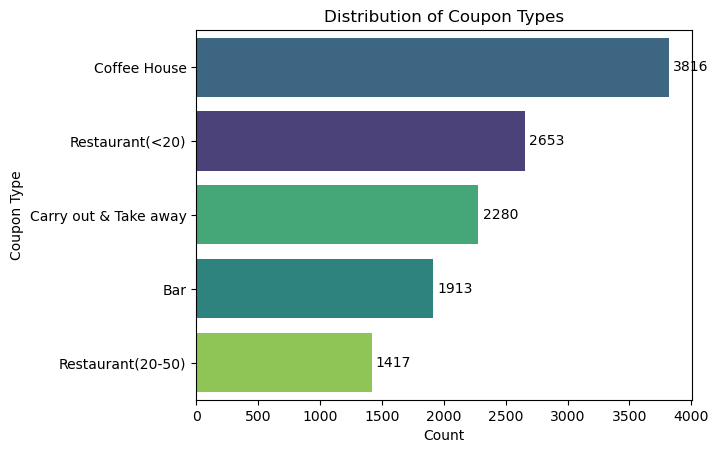

<Figure size 640x480 with 0 Axes>

In [15]:
#plt.figure(figsize=(10,5))
ax = sns.countplot(y='coupon', data=cleanData, order=cleanData['coupon'].value_counts().index , palette='viridis' , hue = 'coupon')
plt.title('Distribution of Coupon Types')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.show()
plt.savefig("pictures/disTypes.png")

6. Use a histogram to visualize the temperature column.

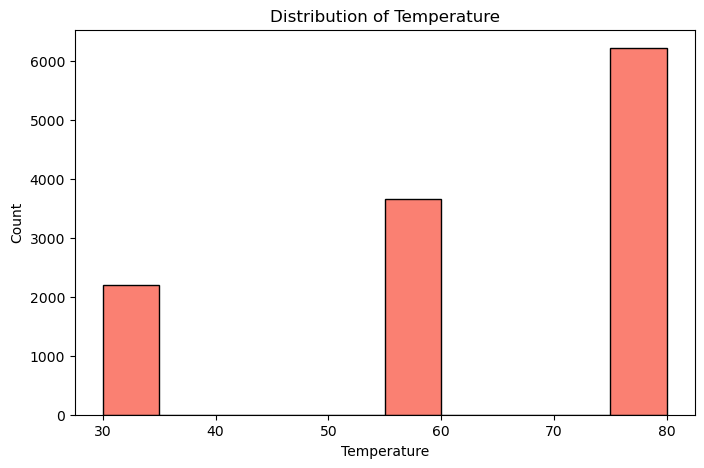

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(8,5))
plt.hist(cleanData['temperature'], color='salmon', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()
plt.savefig("pictures/distTemperature.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
bcdf = cleanData[cleanData['coupon'] == 'Bar']
bcdf.sample(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
584,Work,Alone,Sunny,55,7AM,Bar,1d,Male,31,Single,0,Some college - no degree,Sales & Related,$37500 - $49999,no,4~8,gt8,gt8,1~3,less1,1,1,1,0,1,1
9105,Work,Alone,Sunny,30,7AM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Sales & Related,$25000 - $37499,no,less1,never,1~3,less1,less1,1,1,0,1,0,1
3341,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Unmarried partner,1,Bachelors degree,Business & Financial,$62500 - $74999,no,never,less1,4~8,1~3,never,1,1,0,0,1,0
2751,Work,Alone,Sunny,55,7AM,Bar,1d,Male,36,Single,0,Some college - no degree,Sales & Related,$50000 - $62499,no,never,never,less1,4~8,less1,1,1,1,0,1,0
5185,Home,Alone,Sunny,80,10PM,Bar,1d,Female,50plus,Single,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$12500 - $24999,no,never,never,4~8,4~8,less1,1,1,0,1,0,0
9190,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,21,Single,0,Bachelors degree,Legal,$87500 - $99999,no,1~3,never,less1,less1,less1,1,0,0,0,1,1
7883,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$37500 - $49999,no,1~3,gt8,4~8,4~8,less1,1,1,0,0,1,1
7715,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Female,31,Single,0,Bachelors degree,Unemployed,$100000 or More,no,never,4~8,gt8,4~8,less1,1,1,0,0,1,0
10865,Home,Partner,Sunny,30,10PM,Bar,2h,Male,41,Single,0,Bachelors degree,Business & Financial,$62500 - $74999,no,1~3,4~8,1~3,4~8,4~8,1,1,1,0,1,1
7811,Home,Alone,Sunny,80,6PM,Bar,2h,Male,36,Married partner,0,Associates degree,Management,$100000 or More,no,1~3,1~3,1~3,1~3,1~3,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [18]:
bcdf_accepted_percentage = bcdf['Y'].mean() * 100 
bcdf_percentage = round(float(bcdf_accepted_percentage) ,2)
print("Bar Coupon Acceptance rate =" , bcdf_percentage ,"%")

Bar Coupon Acceptance rate = 41.19 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
bcdf['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [20]:
count_more = bcdf[bcdf['Bar'].isin(['gt8', '4~8'])].shape[0]
count_less = bcdf[bcdf['Bar'].isin(['never', 'less1' , '1~3'])].shape[0]
print(count_more , count_less)

193 1720


In [21]:
filtered = bcdf[bcdf['Bar'].isin(['gt8', '4~8'])]
#y_counts = filtered['Y'].value_counts()
#ratio = y_counts.get(1, 0) / y_counts.get(0, 1)  # Avoid division by zero
#print("Y=1 count:", y_counts.get(1, 0))
#print("Y=0 count:", y_counts.get(0, 0))
#print("Ratio (Y=1 : Y=0) =", ratio)
percent_y1 = (filtered['Y'].mean()) * 100
print(f"Percentage of those who accepted the coupon among Frequent Visitors : {percent_y1:.2f}%")

Percentage of those who accepted the coupon among Frequent Visitors : 76.17%


In [22]:
filtered_less = bcdf[bcdf['Bar'].isin(['never', 'less1' , '1~3'])]
#y_counts_less = filtered_less['Y'].value_counts()
#ratio_less = y_counts_less.get(1, 0) / y_counts_less.get(0, 1)  # Avoid division by zero
#print("Y=1 count:", y_counts_less.get(1, 0))
#print("Y=0 count:", y_counts_less.get(0, 0))
#print("Ratio (Y=1 : Y=0) =", ratio_less)
percent_y1_less = (filtered_less['Y'].mean()) * 100
print(f"Percentage of those who accepted the coupon among non-frequest visitors : {percent_y1_less:.2f}%")

Percentage of those who accepted the coupon among non-frequest visitors : 37.27%


###### 76.17% of those who GO to the bar more frequently accepted the coupon , where as 
###### 37.27% of those who DONOT GO  to the bar frequently accepted the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
filtered_morethan1 = bcdf[bcdf['Bar'].isin(['gt8', '4~8', '1~3'])]
filtered_morethan1['passanger'].unique()

array(['Friend(s)', 'Alone', 'Partner', 'Kid(s)'], dtype=object)

In [24]:
count_y1_morethan25 = filtered_morethan1[ (filtered_morethan1['Y'] == 1) & (filtered_morethan1['age'].isin(['26', '31', '50plus', '41', '36', '46']))].shape[0]
count_y0_morethan25 = filtered_morethan1[ (filtered_morethan1['Y'] == 0) & (filtered_morethan1['age'].isin(['26', '31', '50plus', '41', '36', '46']))].shape[0]
count_y1_lessthan25 = filtered_morethan1[ (filtered_morethan1['Y'] == 1) & (filtered_morethan1['age'].isin(['21', 'below21']))].shape[0]
count_y0_lessthan25 = filtered_morethan1[ (filtered_morethan1['Y'] == 0) & (filtered_morethan1['age'].isin(['21', 'below21']))].shape[0]
print( "Coupon Accepted and Age > 25 :  " , count_y1_morethan25)
print("Coupon Denied and Age > 25    :" , count_y0_morethan25 )
print( "Coupon Accepted and Age < 25 : " , count_y1_lessthan25)
print( "Coupon Denied and Age < 25   : " , count_y0_lessthan25)
print( count_y1_morethan25/(count_y1_morethan25 + count_y0_morethan25) *100 , "% of people > age 25 accepted the coupon" )
print( count_y1_lessthan25/(count_y1_lessthan25+count_y0_lessthan25) * 100 , "% of people < age 25 accepted the coupon" )


Coupon Accepted and Age > 25 :   278
Coupon Denied and Age > 25    : 125
Coupon Accepted and Age < 25 :  114
Coupon Denied and Age < 25   :  55
68.98263027295285 % of people > age 25 accepted the coupon
67.45562130177515 % of people < age 25 accepted the coupon


#### 68.93 % of people above 25 years accepted the coupon 
#### 67.45 % of people less than 25 years accepted the coupon. 
#### The age > 25 or age < 25 doesnt seem to be a major factor. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


######  For this question , we can use the same dataframe we used above , "filtered_morethan1". 
###### On this we must apply the filters for "occupation NOT-EQUAL-TO farming , fishing , forestry"  and "passanger NOT-EQUAL-TO alone , Kid(s) . 
###### We did not consider the age here. 

In [25]:
count_y1_passNotKid_otherOCC = filtered_morethan1[ (filtered_morethan1['Y'] == 1) & (~filtered_morethan1['passanger'].isin(['Kid(s)', 'Alone'])) & (~filtered_morethan1['occupation'].isin(['farming', 'fishing' , 'forestry']))].shape[0]
count_y0_passNotKid_otherOCC = filtered_morethan1[ (filtered_morethan1['Y'] == 0) & (~filtered_morethan1['passanger'].isin(['Kid(s)', 'Alone'])) & (~filtered_morethan1['occupation'].isin(['farming', 'fishing' , 'forestry']))].shape[0]

#print(filtered_morethan1['passanger'].unique())
#print(filtered_morethan1['occupation'].unique())
 
print(" % = " , count_y1_passNotKid_otherOCC / (count_y1_passNotKid_otherOCC + count_y0_passNotKid_otherOCC) * 100 )

 % =  71.42857142857143


######  We can determine that Coupon Acceptance rate for 
###### - Divers who go to bars more than once a month 
###### - and who had a passenger , but not a KID as a passanger 
###### - and whose occupation is not farming , fishing , forestry 

###### = 71.42 % 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [26]:
# Finding go to bars more than once a month, had passengers that were not a kid, and were not widowed
count_y1_notwidowed = filtered_morethan1[ (filtered_morethan1['Y'] == 1) & (~filtered_morethan1['passanger'].isin(['Kid(s)', 'Alone'])) ].shape[0]
count_y0_notwidowed = filtered_morethan1[ (filtered_morethan1['Y'] == 0) & (~filtered_morethan1['passanger'].isin(['Kid(s)', 'Alone'])) ].shape[0]
print( "% of drivers that accepted the coupoun who had passengers that were not a kid, and were not widowed = ",  count_y1_notwidowed / (count_y1_notwidowed + count_y0_notwidowed ) * 100 )
#print(filtered_morethan1['maritalStatus'].unique())

# go to bars more than once a month and are under the age of 30 
count_y1_less30 = filtered_morethan1[ (filtered_morethan1['Y'] == 1) & (~filtered_morethan1['age'].isin(['21', '26' ,'below21' ] ) ) ].shape[0]
count_y0_less30 = filtered_morethan1[ (filtered_morethan1['Y'] == 0 ) & (~filtered_morethan1['age'].isin(['21', '26' ,'below21'])) ].shape[0]
print (f"% of drivers that accepted the coupoun and are under the age of 30 =" , count_y1_less30 / (count_y1_less30  + count_y0_less30) * 100 )
#filtered_morethan1['age'].unique()

# go to cheap restaurants more than 4 times a month and income is less than 50K 
# Filter: cheap restaurants > 4 times a month AND income < $50K
cheapRest = cleanData[(cleanData["RestaurantLessThan20"].isin(["4~8", "greater than 8"])) & (cleanData["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]))]

# Calculate coupon acceptance rate
acceptance_rate = cheapRest["Y"].mean() * 100

print(f"% of drivers that accepted the coupon who go to cheap restaurants more than 4 times a month and income is less than 50K = {acceptance_rate:.2f}%")


% of drivers that accepted the coupoun who had passengers that were not a kid, and were not widowed =  71.42857142857143
% of drivers that accepted the coupoun and are under the age of 30 = 63.934426229508205
% of drivers that accepted the coupon who go to cheap restaurants more than 4 times a month and income is less than 50K = 57.62%


##### Let us represent the last data visually. 

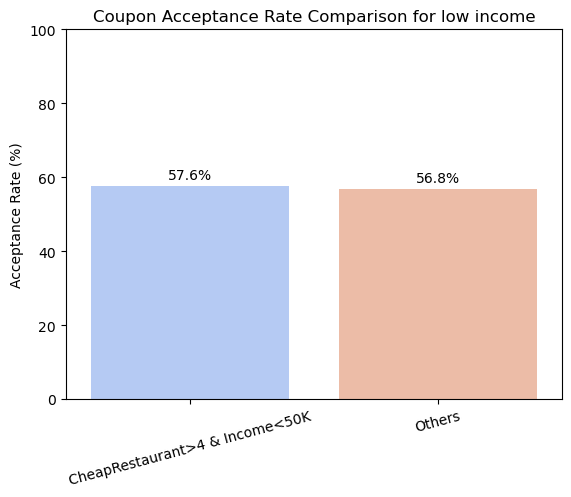

<Figure size 640x480 with 0 Axes>

In [27]:
# Filter for "cheap restaurant > 4 times a month" AND "income < 50K"
cheap_restaurant_filter = cleanData["RestaurantLessThan20"].isin(["4~8", "greater than 8"])
low_income_filter = cleanData["income"].isin([ "Less than $12500",  "$12500 - $24999",   "$25000 - $37499",  "$37500 - $49999"])

# Create a new column for the group
cleanData["Group"] = "Others"
cleanData.loc[cheap_restaurant_filter & low_income_filter, "Group"] = "CheapRestaurant>4 & Income<50K"

# Calculate acceptance rate by group
acceptance_rates = cleanData.groupby("Group")["Y"].mean().reset_index()
acceptance_rates["AcceptanceRate(%)"] = acceptance_rates["Y"] * 100

# Plot
ax = sns.barplot(
    data=acceptance_rates,
    x="Group",
    y="AcceptanceRate(%)",
    hue="Group",
    palette="coolwarm"
)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", padding=3)

plt.title("Coupon Acceptance Rate Comparison for low income")
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("")
plt.xticks(rotation=15)
plt.ylim(0, 100)
plt.show()
plt.savefig("pictures/coupAccpCheap.png")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Findings
#### Overall acceptance rate for coupons is about 57 % 
#### Acceptance of Bar Coupon is about 41 % 
#### Frequency of visits matters a lot . People who go to bars more often are much more likely to accept coupons. Frequent visitors accepted 76% of bar coupons 
#### Those not having a kid in the car is car are more likely to accept the coupon. 71 % acceptance here. 
#### Those with lower inccome , but are used to going to a less expensive restaurant , but frequently , are as likely to accept the coupon as those with higher income , but go less frequently. 
